# Proyek Analisis Data: E-Commerce Dataset

- **Nama:** Nabil Muhammad Raihan
- **Email:** namura152@gmail.com
- **ID Dicoding:** nabilraihan00


## Menentukan Pertanyaan Bisnis


- Pertanyaan 1: Bagaimana performa penjualan dan revenue sejak awal hingga saat ini?
- Pertanyaan 2: Pada hari apa customer paling banyak melakukan pemesanan
- Pertanyaan 3: Berapa persentase ketepatan waktu pengiriman barang?
- Pertanyaan 4: Kota apa saja yang memiliki order terbanyak?
- Pertanyaan 5: Kategori barang apa saja yang paling banyak menghasilkan keuntungan?
- Pertanyaan 6: Berapa banyak order berdasarkan kategori berat barang?
- Pertanyaan 7: Bagaimana peta persebaran kota berdasarkan jumlah revenue?


## Import Semua Packages/Library yang Digunakan


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import streamlit as st

## Data Wrangling


### Gathering Data


In [2]:
# load data customer
customers_df = pd.read_csv(


    'D:\dashboard-ecommerce\E-Commerce Public Dataset\customers_dataset.csv')


customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
# Load data geolocation
geolocation_df = pd.read_csv(


    './E-Commerce Public Dataset/geolocation_dataset.csv')


geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
# Load data order item
orders_item_df = pd.read_csv(


    './E-Commerce Public Dataset/order_items_dataset.csv')


orders_item_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
# Load data order payment
orders_payments_df = pd.read_csv(


    './E-Commerce Public Dataset/order_payments_dataset.csv')


orders_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
# Load data order review
orders_review_df = pd.read_csv(


    './E-Commerce Public Dataset/order_reviews_dataset.csv')


orders_review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
# Load data orders
orders_df = pd.read_csv('./E-Commerce Public Dataset/orders_dataset.csv')


orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
# Load data product category
product_category_df = pd.read_csv(


    './E-Commerce Public Dataset/product_category_name_translation.csv')


product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [9]:
# Load data product
products_df = pd.read_csv('./E-Commerce Public Dataset/products_dataset.csv')


products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
# Load data seller
seller_df = pd.read_csv('./E-Commerce Public Dataset/sellers_dataset.csv')


seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Assessing Data


#### customers_df


In [11]:
# cek null value
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
# cek deskripsi kolom
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# cek data duplikat
customers_df.duplicated().sum()

0

In [14]:
# cek statistik data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### geolocation_df


In [15]:
# cek deskripsi kolom
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
# cek statistik data
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [17]:
# cek null value
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
# cek data duplikat
geolocation_df.duplicated().sum()

261831

#### orders_item_df


In [19]:
# cek deskripsi kolom

orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# cek statistik data
orders_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [21]:
# cek null value
orders_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
# cek data duplikat
orders_item_df.duplicated().sum()

0

#### orders_payments_df


In [23]:
# cek deskripsi kolom
orders_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
# cek statistik data
orders_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [25]:
# cek null value
orders_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
# cek data duplikat
orders_payments_df.duplicated().sum()

0

#### orders_review_df


In [27]:
# cek deskripsi kolom
orders_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
# cek statistik data
orders_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [29]:
# cek data duplikat
orders_review_df.duplicated().sum()

0

In [30]:
# cek null value
orders_review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### orders_df


In [31]:
# cek deskripsi kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
# cek statistik data
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [33]:
# cek null value
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
# cek data duplikat
orders_df.duplicated().sum()

0

#### product_category_df


In [35]:
# cek deskripsi kolom
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
# cek statistik data
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [37]:
# cek null value
product_category_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
# cek data duplikat
product_category_df.duplicated().sum()

0

#### products_df


In [39]:
# cek deskripsi kolom
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
# cek statistik data
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [41]:
# cek null value
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
# cek data duplikat
products_df.duplicated().sum()

0

#### seller_df


In [43]:
# cek deskripsi kolom
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
# cek statistik data
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [45]:
# cek null value
seller_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
# cek data duplikat
seller_df.duplicated().sum()

0

### Cleansing data


#### Menghilangkan data duplikat


In [47]:
geolocation_df.drop_duplicates(inplace=True)

In [48]:
# Melakukan grouping latitude dan longitude berdasarkan nilai max
geolocation_city_df = geolocation_df.groupby(by='geolocation_city').agg({


    'geolocation_lng': 'max',


    'geolocation_lat': 'max'


})


geolocation_city_df = geolocation_city_df.reset_index()
geolocation_city_df

,geolocation_city,geolocation_lng,geolocation_lat
0,* cidade,-49.334374,-25.571748
1,...arraial do cabo,-42.029834,-22.969370
2,4o. centenario,-53.069433,-24.271860
3,4º centenario,-53.074516,-24.277697
4,abadia de goias,-49.426674,-16.756821
...,...,...,...
8006,áurea,-52.054195,-27.692454
8007,ângulo,-51.916100,-23.193593
8008,érico cardoso,-42.134282,-13.393047
8009,óbidos,-55.510995,-1.897693


#### Menangani missing value


In [49]:
# Mengganti null value dari kolom 'review_comment_title' dengan 'without title'
orders_review_df['review_comment_title'] = orders_review_df['review_comment_title'].fillna(


    'without title')
# Mengganti null value 'review_comment_message' dengan 'without message'


orders_review_df['review_comment_message'] = orders_review_df['review_comment_message'].fillna(


    'without message')

In [50]:
orders_review_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [51]:
# Mengganti null value kolom 'product_category_name' dengan nilai 'without category name'
products_df['product_category_name'] = products_df['product_category_name'].fillna(


    'without category name')


products_df.isnull().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### Fixing data type


In [52]:
# Membuat dictionary dari dataframe serta kolom yang tipe datanya ingin diubah
dataframes_columns = {


    'orders_df': {
        'df': orders_df,


        'columns': ['order_approved_at', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


    },


    'orders_review_df': {


        'df': orders_review_df,


        'columns': ['review_creation_date', 'review_answer_timestamp']


    },


    'orders_item_df': {
        'df': orders_item_df,


        'columns': ['shipping_limit_date']


    }


}


# Looping melalui dictionary dan mengubah tipe data kolom menjadi datetime


for df_info in dataframes_columns.values():

    df = df_info['df']

    columns = df_info['columns']
    for col in columns:

        df[col] = pd.to_datetime(df[col])

In [53]:
# cek deskripsi kolom
orders_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [54]:
# cek deskripsi kolom
orders_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [55]:
# cek deskripsi kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)


### Explore ...


#### customers_df


In [56]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### orders_df


In [57]:
# Mengetahui jumlah hari pengiriman barang
orders_df['delivery_time'] = (

    orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

orders_df['delivery_time'] = orders_df['delivery_time'].astype('Int64')

orders_df['day_of_purchase'] = orders_df['order_purchase_timestamp'].dt.day_name()

orders_df['day_of_purchase'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,day_of_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,Tuesday
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8,Thursday
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22,Tuesday
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24,Sunday
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17,Monday


In [58]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,day_of_purchase
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.0,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,<NA>,7
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,<NA>,Monday
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,<NA>,16196
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12.094086,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0.0,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6.0,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10.0,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15.0,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,209.0,NaN


In [59]:
# Join data customer dengan geolocation
customers_geolocation_df = pd.merge(
    left=customers_df,
    right=geolocation_city_df,
    how="left",
    left_on="customer_city",
    right_on="geolocation_city"
)
customers_geolocation_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_city,geolocation_lng,geolocation_lat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,franca,-47.349187,-20.468849
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,sao bernardo do campo,-46.442695,-23.556812
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,sao paulo,-46.366472,-23.383208
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,mogi das cruzes,-46.079875,-23.358797
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,campinas,-45.413097,-22.739354


In [60]:
# join data 'customers_geolocation_df' dengan order
customers_geolocation_df_selected = customers_geolocation_df[[

    'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng']]


orders_customers_df = pd.merge(
    left=orders_df,

    right=customers_geolocation_df_selected,

    how='left',
    left_on='customer_id',

    right_on='customer_id'

)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,day_of_purchase,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,Monday,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.383208,-46.366472
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,Tuesday,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.117511,-38.456194
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,Wednesday,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.740474,-48.500253
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,Saturday,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-3.503040,-35.252563
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,Tuesday,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-7.220895,-36.632799


In [61]:
# join data product dengan product category
product_english_df = pd.merge(
    left=products_df,
    right=product_category_df,

    how='left',

    left_on='product_category_name',

    right_on='product_category_name'

)

product_english_df = product_english_df[[

    'product_id', 'product_category_name_english', 'product_weight_g']]

product_english_df.head()

,product_id,product_category_name_english,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0


In [62]:
# join data order item dengan data ketegori product
order_item_product_df = pd.merge(

    left=orders_item_df,

    right=product_english_df,

    how='left',
    left_on='product_id',
    right_on='product_id'

)

order_item_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,3050.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,3750.0


In [63]:
# join product item dengan seller
order_item_product_seller_df = pd.merge(
    left=order_item_product_df,

    right=seller_df[['seller_id', 'seller_city', 'seller_state']],

    how='left',
    left_on='seller_id',
    right_on='seller_id'

)

order_item_product_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_weight_g,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,3050.0,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,200.0,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,3750.0,loanda,PR


In [64]:
# join order_customer dengan order_item_product_seller
all_df = pd.merge(
    left=orders_customers_df,

    right=order_item_product_seller_df,

    how='left',
    left_on='order_id',
    right_on='order_id'

)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,day_of_purchase,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_weight_g,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,Monday,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,500.0,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,Tuesday,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,400.0,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,Wednesday,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,420.0,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,Saturday,...,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,450.0,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,Tuesday,...,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,250.0,mogi das cruzes,SP


In [65]:
# Menambahkan kolom 'delivery_status' untuk mengetahui delivery barang on time atau tidak
all_df['delivery_status'] = all_df.apply(lambda row: (

    'not on time' if pd.notnull(row['order_delivered_customer_date']) and row['order_delivered_customer_date'] > row['order_estimated_delivery_date'] else

    'on time' if pd.notnull(row['order_delivered_customer_date']) and row['order_delivered_customer_date'] <= row['order_estimated_delivery_date'] else

    np.nan

), axis=1)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,day_of_purchase,...,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_weight_g,seller_city,seller_state,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,Monday,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,500.0,maua,SP,on time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,Tuesday,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,400.0,belo horizonte,SP,on time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,Wednesday,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,420.0,guariba,SP,on time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,Saturday,...,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,450.0,belo horizonte,MG,on time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,Tuesday,...,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,250.0,mogi das cruzes,SP,on time


In [66]:
# Memilih kolom yang berkaitan dengan pertanyaan bisnis
new_columns = ['order_id', 'order_status', 'seller_id', 'seller_city', 'seller_state', 'order_item_id', 'product_id',

               'product_category_name_english', 'customer_id', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng', 'day_of_purchase', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_time', 'delivery_status', 'price', 'freight_value', 'product_weight_g']

all_df = all_df.reindex(columns=new_columns)

all_df.head()

,order_id,order_status,seller_id,seller_city,seller_state,order_item_id,product_id,product_category_name_english,customer_id,customer_city,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status,price,freight_value,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,1.0,87285b34884572647811a353c7ac498a,housewares,9ef432eb6251297304e76186b10a928d,sao paulo,...,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,on time,29.99,8.72,500.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,SP,1.0,595fac2a385ac33a80bd5114aec74eb8,perfumery,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,...,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,on time,118.70,22.76,400.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1.0,aa4383b373c6aca5d8797843e5594415,auto,41ce2a54c0b03bf3443c3d931a367089,vianopolis,...,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,on time,159.90,19.22,420.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,...,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,on time,45.00,27.20,450.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,stationery,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,...,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,on time,19.90,8.72,250.0


In [67]:
# melakukan kategorisasi berat barang menjadi light, medium, dan heavy
all_df['weight_group'] = all_df.product_weight_g.apply(
    lambda x: "light" if x <= 300 else ("medium" if x <= 1800 else 'heavy'))
all_df

,order_id,order_status,seller_id,seller_city,seller_state,order_item_id,product_id,product_category_name_english,customer_id,customer_city,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status,price,freight_value,product_weight_g,weight_group
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,1.0,87285b34884572647811a353c7ac498a,housewares,9ef432eb6251297304e76186b10a928d,sao paulo,...,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,on time,29.99,8.72,500.0,medium
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,SP,1.0,595fac2a385ac33a80bd5114aec74eb8,perfumery,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,...,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,on time,118.70,22.76,400.0,medium
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,1.0,aa4383b373c6aca5d8797843e5594415,auto,41ce2a54c0b03bf3443c3d931a367089,vianopolis,...,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,on time,159.90,19.22,420.0,medium
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,f88197465ea7920adcdbec7375364d82,sao goncalo do amarante,...,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13,on time,45.00,27.20,450.0,medium
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,stationery,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,...,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2,on time,19.90,8.72,250.0,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,delivered,1f9ab4708f3056ede07124aad39a2554,tupa,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,baby,1fca14ff2861355f6e5f14306ff977a7,praia grande,...,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22,on time,174.90,20.10,4950.0,heavy
113421,83c1379a015df1e13d02aae0204711ab,delivered,d50d79cb34e38265a8649c383dcffd48,sao paulo,SP,1.0,b80910977a37536adeddd63663f916ad,home_appliances_2,1aa71eb042121263aafbe80c1b562c9c,nova vicosa,...,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24,on time,205.99,65.02,13300.0,heavy
113422,11c177c8e97725db2631073c19f07b62,delivered,a1043bafd471dff536d0c462352beb48,ilicinea,MG,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,japuiba,...,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17,on time,179.99,40.59,6550.0,heavy
113423,11c177c8e97725db2631073c19f07b62,delivered,a1043bafd471dff536d0c462352beb48,ilicinea,MG,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,japuiba,...,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17,on time,179.99,40.59,6550.0,heavy


## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana performa penjualan dan revenue sejak awal hingga saat ini?


In [68]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
# monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df.index = monthly_orders_df.index.strftime(
    '%b-%Y')  # mengubah format order date menjadi nama bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,Sep-2016,4,267.36
1,Oct-2016,324,49507.66
2,Nov-2016,0,0.00
3,Dec-2016,1,10.90
4,Jan-2017,800,120312.87


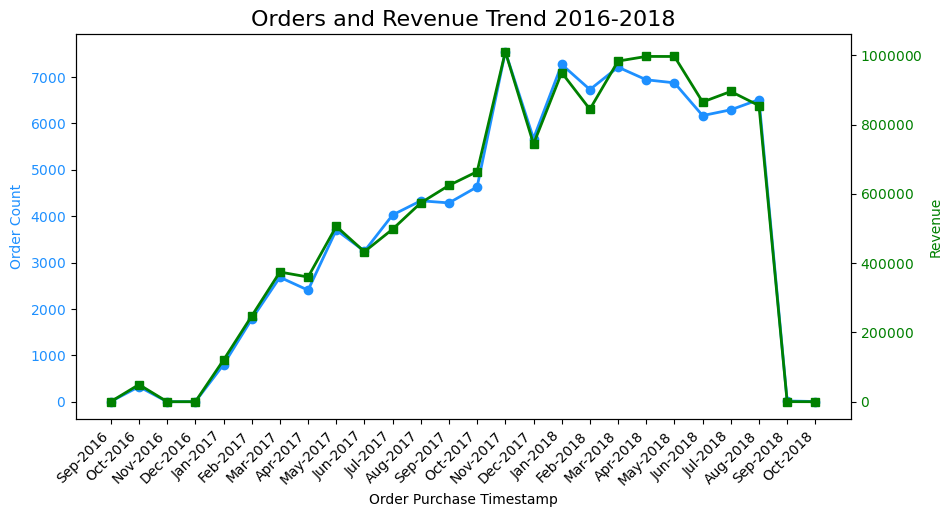

In [69]:
# Membuat figure dan axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Menggambar grafik pertama dengan order count
ax1.plot(monthly_orders_df["order_purchase_timestamp"],
         monthly_orders_df["order_count"], linewidth=2, marker='o', color='dodgerblue')
ax1.set_xlabel('Order Purchase Timestamp')
ax1.set_ylabel('Order Count', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')

# Menonaktifkan notasi ilmiah pada sumbu y1
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=10, rotation=45, ha='right')

# Membuat sumbu y kedua
ax2 = ax1.twinx()
ax2.plot(monthly_orders_df["order_purchase_timestamp"],
         monthly_orders_df["revenue"], linestyle="-", marker='s', linewidth=2, color='green')
ax2.set_ylabel('Revenue', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Menonaktifkan notasi ilmiah pada sumbu y2
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='plain', axis='y')

# Menambahkan judul
plt.title("Orders and Revenue Trend 2016-2018", loc="center", fontsize=16)
plt.show()

### Pertanyaan 2: Pada hari apa customer paling banyak melakukan pemesanan


In [70]:
day_of_purchase_df = all_df.groupby(by='day_of_purchase').agg({
    'order_id': 'nunique'
})
day_of_purchase_df = day_of_purchase_df.reset_index()
day_of_purchase_df.rename(columns={
    "order_id": "count_of_order"
}, inplace=True)
day_of_purchase_df = day_of_purchase_df.sort_values(
    by='count_of_order', ascending=False)
day_of_purchase_df

,day_of_purchase,count_of_order
1,Monday,16196
5,Tuesday,15963
6,Wednesday,15552
4,Thursday,14761
0,Friday,14122
3,Sunday,11960
2,Saturday,10887


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19684\3072151787.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day_of_purchase', y='count_of_order', data=day_of_purchase_df,


Text(0.5, 1.0, 'Top days most orders created')

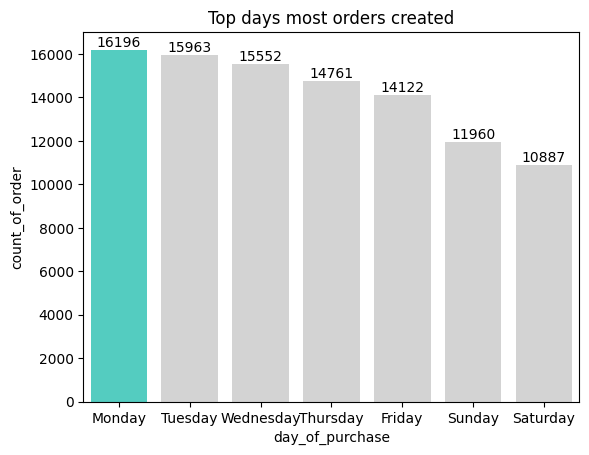

In [71]:
def set_custom_palette(series, max_color='turquoise', other_color='lightgrey'):
    max_val = series.max()
    pal = []

    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal


ax = sns.barplot(x='day_of_purchase', y='count_of_order', data=day_of_purchase_df,
                 palette=set_custom_palette(day_of_purchase_df['count_of_order']))

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title('Top days most orders created')

### Pertanyaan 3: Berapa persentase ketepatan waktu pengiriman barang?


In [72]:
delivery_status_df = all_df.groupby(
    by='delivery_status').order_id.nunique().reset_index()
delivery_status_df.rename(columns={
    "order_id": "order"
}, inplace=True)
delivery_status_df

,delivery_status,order
0,not on time,7827
1,on time,88649


([<matplotlib.patches.Wedge at 0x1a03a606af0>,
 [Text(1.0644645163713071, 0.2773360657873394, 'not on time'),
  Text(-1.0644645423373789, -0.2773359661249775, 'on time')],
 [Text(0.5806170089298038, 0.1512742177021851, '8.1%'),
  Text(-0.5806170230931157, -0.15127416334089683, '91.9%')])

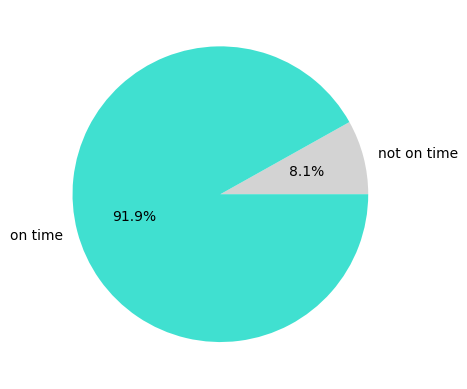

In [73]:
fig, ax = plt.subplots()
ax.pie(delivery_status_df['order'], labels=delivery_status_df['delivery_status'],
       autopct='%1.1f%%', colors=['lightgrey', 'turquoise'])

In [74]:
city_df = all_df.groupby(by='customer_city').agg({
    'price': 'sum',
    'order_id': 'nunique'
})
city_df = city_df.reset_index()
city_df = city_df.rename(columns={
    'price': 'revenue',
    'order_id': 'order_count'
})
city_df = city_df.sort_values(by=['revenue', 'order_count'], ascending=False)
city_df = city_df.head(10)
city_df

,customer_city,revenue,order_count
3597,sao paulo,1914924.54,15540
3155,rio de janeiro,992538.86,6882
453,belo horizonte,355611.13,2773
558,brasilia,301920.25,2131
1143,curitiba,211738.06,1521
2964,porto alegre,190562.08,1379
707,campinas,187844.53,1444
3247,salvador,181104.42,1245
1529,guarulhos,144268.39,1189
2461,niteroi,117907.12,849


### Pertanyaan 4: Kota apa saja yang memiliki order terbanyak?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sao paulo'),
  Text(1, 0, 'rio de janeiro'),
  Text(2, 0, 'belo horizonte'),
  Text(3, 0, 'brasilia'),
  Text(4, 0, 'curitiba'),
  Text(5, 0, 'porto alegre'),
  Text(6, 0, 'campinas'),
  Text(7, 0, 'salvador'),
  Text(8, 0, 'guarulhos'),
  Text(9, 0, 'niteroi')])

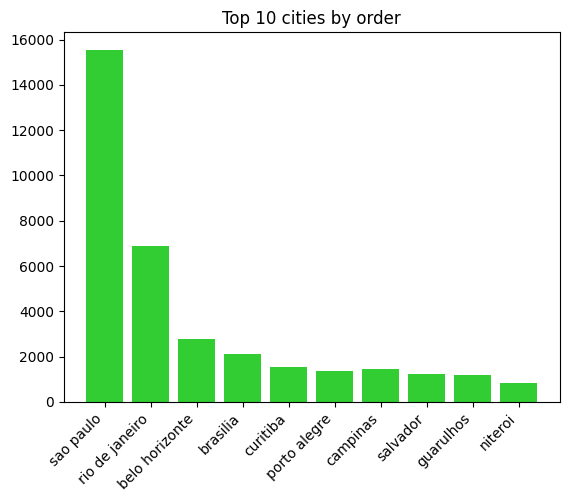

In [75]:
fig, ax = plt.subplots()

ax.bar(city_df['customer_city'], city_df['order_count'], color='limegreen')
ax.set_title("Top 10 cities by order")
plt.xticks(fontsize=10, rotation=45, ha='right')

In [76]:
category_df = all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
category_df = category_df.reset_index()
category_df = category_df.rename(columns={
    'product_category_name_english': 'category_name',
    'order_id': 'order_count',
    'price': 'revenue'
})
category_df = category_df.sort_values(by='revenue', ascending=False)
category_df = category_df.head(10)
category_df

,category_name,order_count,revenue
43,health_beauty,8836,1258681.34
70,watches_gifts,5624,1205005.68
7,bed_bath_table,9417,1036988.68
65,sports_leisure,7720,988048.97
15,computers_accessories,6689,911954.32
39,furniture_decor,6449,729762.49
20,cool_stuff,3632,635290.85
49,housewares,5884,632248.66
5,auto,3897,592720.11
42,garden_tools,3518,485256.46


### Pertanyaan 5: Kategori barang apa saja yang paling banyak menghasilkan keuntungan?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'health_beauty'),
  Text(1, 0, 'watches_gifts'),
  Text(2, 0, 'bed_bath_table'),
  Text(3, 0, 'sports_leisure'),
  Text(4, 0, 'computers_accessories'),
  Text(5, 0, 'furniture_decor'),
  Text(6, 0, 'cool_stuff'),
  Text(7, 0, 'housewares'),
  Text(8, 0, 'auto'),
  Text(9, 0, 'garden_tools')])

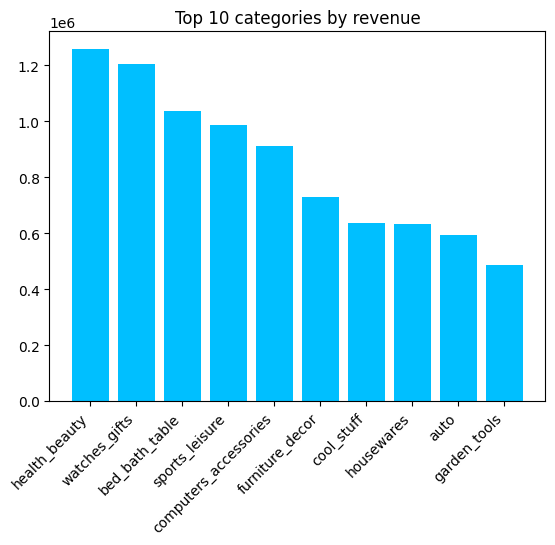

In [77]:
fig, ax = plt.subplots()

ax.bar(category_df['category_name'],
       category_df['revenue'], color='deepskyblue')
ax.set_title("Top 10 categories by revenue")
plt.xticks(fontsize=10, rotation=45, ha='right')

### Pertanyaan 6: Berapa banyak order berdasarkan kategori berat barang?


In [78]:
weight_category_df = all_df.groupby(by='weight_group').agg({
    'order_id': 'count'
})
weight_category_df = weight_category_df.reset_index()
weight_category_df = weight_category_df.rename(columns={
    'order_id': 'order_count'
})
weight_category_df

,weight_group,order_count
0,heavy,28557
1,light,31749
2,medium,53119


([0, 1, 2], [Text(0, 0, 'heavy'), Text(1, 0, 'light'), Text(2, 0, 'medium')])

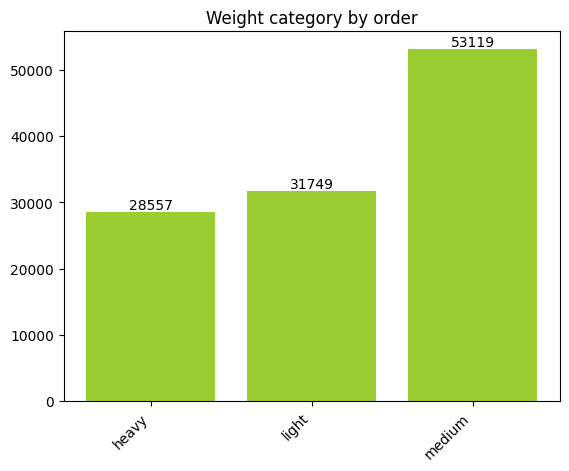

In [79]:
fig, ax = plt.subplots()

ax.bar(weight_category_df['weight_group'],
       weight_category_df['order_count'], color='yellowgreen')
ax.set_title("Weight category by order")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(fontsize=10, rotation=45, ha='right')

### Pertanyaan 7: Bagaimana peta persebaran kota berdasarkan jumlah revenue?


In [80]:
map_df = all_df.groupby(by='customer_city').agg({
    'geolocation_lng': 'max',
    'geolocation_lat': 'max',
    'order_id': 'count',
    'price': 'sum'
})

map_df = map_df.reset_index()
map_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    'geolocation_lng': 'longitude',
    'geolocation_lat': 'latitude',
}, inplace=True)
map_df = map_df.dropna()
map_df.head()

,customer_city,longitude,latitude,order_count,revenue
0,abadia dos dourados,-47.398266,-18.369768,3,358.90
1,abadiania,-48.704645,-16.180524,1,949.99
2,abaete,-45.434237,-19.146228,12,1732.81
3,abaetetuba,-48.755845,-1.710427,14,4028.57
4,abaiara,-39.024462,-7.341492,2,262.90


In [81]:
st.map(data=map_df, latitude='latitude', longitude='longitude', size='revenue')

2024-07-13 10:18:39.870 
  command:

    streamlit run c:\Users\LENOVO\.conda\envs\dashboard-ecommerce\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

## Conclusion


- Bagaimana performa penjualan dan revenue sejak awal hingga saat ini?<br>
  Performa penjualan dan revenue terus mengalami peningkatan sejak Januari 2017 hingga puncaknya pada November 2017, setelah itu penjualan dan revenua mengalami fluktuasi hingga akhirnya menurun drastis pada September 2018<br><br>
- Pada hari apa customer paling banyak melakukan pemesanan?<br>
  Hari senin menjadi hari terbanyak customer melakukan pemesanan barang, sebaliknya hari sabtu menjadi hari paling sedikit customer melakukan pemesanan barang<br><br>
- Berapa persentase ketepatan waktu pengiriman barang?<br>
  Persentase pengiriman barang sesuai dengan estimasi mencapai angka 91.9% dari keseluruhan order<br><br>
- Kota apa saja yang memiliki order terbanyak?<br>
  Kota dengan pemesanan barang terbanyak ditempati oleh kota sao paulo, rio de janeiro, dan belo horizonte<br><br>
- Kategori barang apa saja yang paling banyak menghasilkan keuntungan?<br>
  Kategori barang yang menghasilkan revenue terbanyak ditempati oleh health beauty, watches gifts, dan bed bath table<br><br>
- Berapa banyak order berdasarkan kategori berat barang?<br>
  Berdasarkan kategori barang, kategori medium memiliki 53119 order, kategori light memiliki 31749 order, dan kategori heavy memiliki 28557 order<br><br>
- Bagaimana peta persebaran kota berdasarkan jumlah revenue?<br>
  Peta persebaran jumlah revenue berdasarkan kota memperlihatkan lokasi dengan jumlah revenue tertinggi berada di daerah pesisir pantai


In [82]:
all_df.to_csv("./dashboard/all_data.csv", index=False)